In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Patient features: Age, BMI, Smoker, Chronic
X = np.array([
    [45, 30, 1, 2],
    [30, 22, 0, 1],
    [55, 28, 1, 3],
    [50, 35, 1, 2],
    [25, 20, 0, 0],
    [60, 32, 1, 4],
    [40, 27, 0, 1],
    [35, 24, 0, 0]
])

# Labels: 1 = High Risk, 0 = Low Risk
Y = np.array([1, 0, 1, 1, 0, 1, 0, 0])

In [8]:
# Build the classification model
model = Sequential([
    Dense(16, input_dim=4, activation='relu'),   # Hidden layer
    Dense(8, activation='relu'),                # Hidden layer
    Dense(1, activation='sigmoid')              # Output layer (probability)
])

# Compile the model for binary classification
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
model.fit(X, Y, epochs=500, verbose=0)

In [5]:
# Predict disease risk for a new patient
new_patient = np.array([[50, 33, 1, 2]])  # Age=50, BMI=33, Smoker=Yes, Chronic=2
risk_probability = model.predict(new_patient)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [6]:
# Diseases Risk Prediction
print("Predicted disease risk probability:", risk_probability[0][0])
if risk_probability[0][0] >= 0.5:
    print("Prediction: HIGH RISK")
else:
    print("Prediction: LOW RISK")

Predicted disease risk probability: 0.80773294
Prediction: HIGH RISK


## **CONFUSION** **MATRIX**

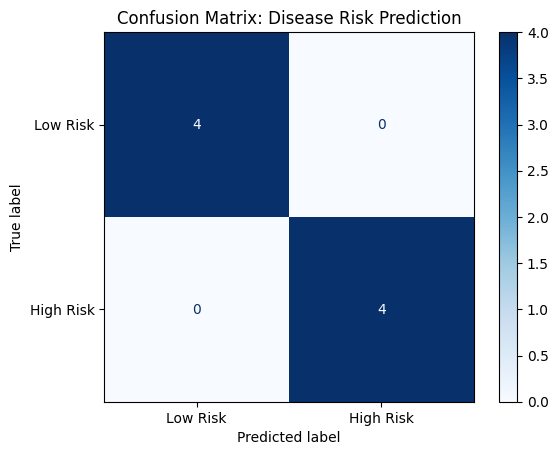

In [7]:
y_true = [1, 0, 1, 1, 0, 1, 0, 0]
y_pred = [1, 0, 1, 1, 0, 1, 0, 0]

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Risk", "High Risk"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Disease Risk Prediction')
plt.savefig('confusion_matrix.png')
plt.show()